## Check hidden layer
- difference across models

In [ ]:
import ast

layer_sizes = pd.read_csv("/home/hyujang/multilingual-inner-lexicon/layer_sizes.csv")
layer_sizes['Hidden_Sizes'] = layer_sizes['Hidden_Sizes'].apply(ast.literal_eval)
layer_sizes = dict(layer_sizes.values)

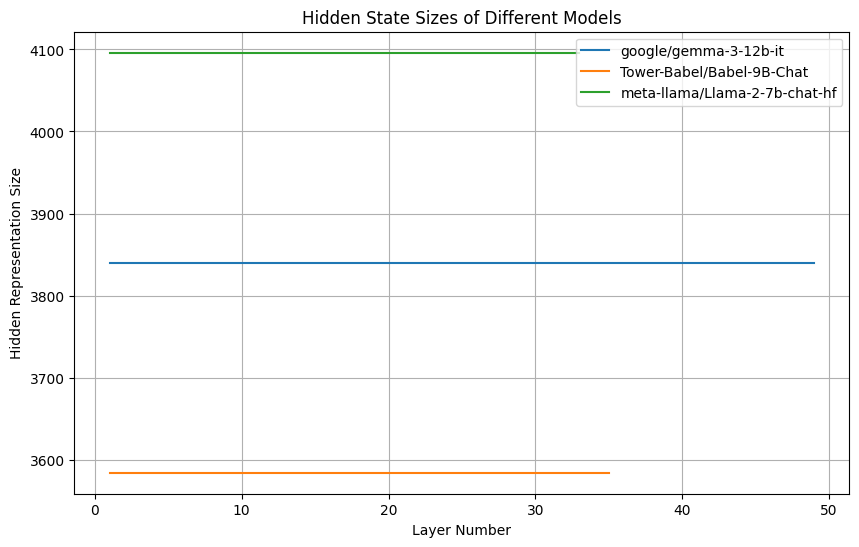

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for model_name, sizes in layer_sizes.items():
    plt.plot(range(1, len(sizes) + 1), sizes, label=model_name)

plt.xlabel("Layer Number")
plt.ylabel("Hidden Representation Size")
plt.title("Hidden State Sizes of Different Models")
plt.legend()
plt.grid(True)
plt.show()

## Check dataset distribution - frequency for 2-token words

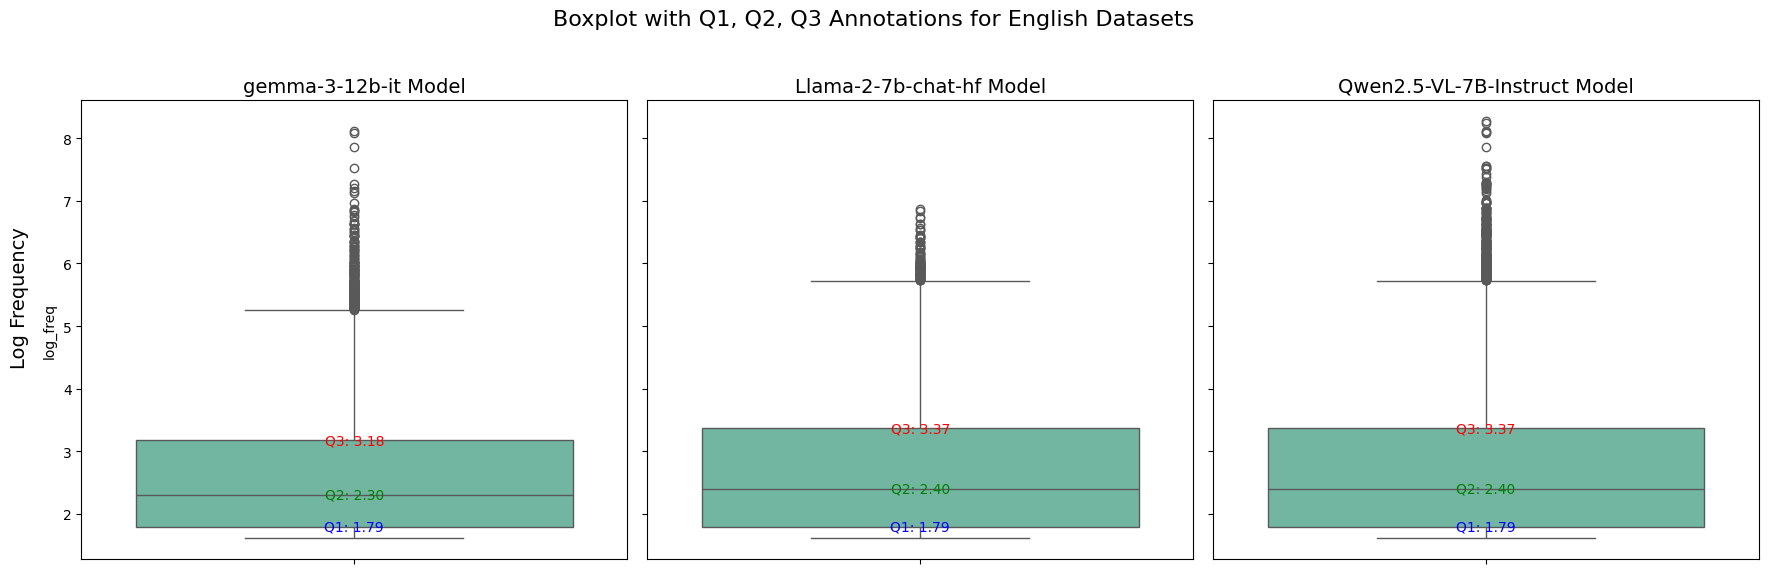

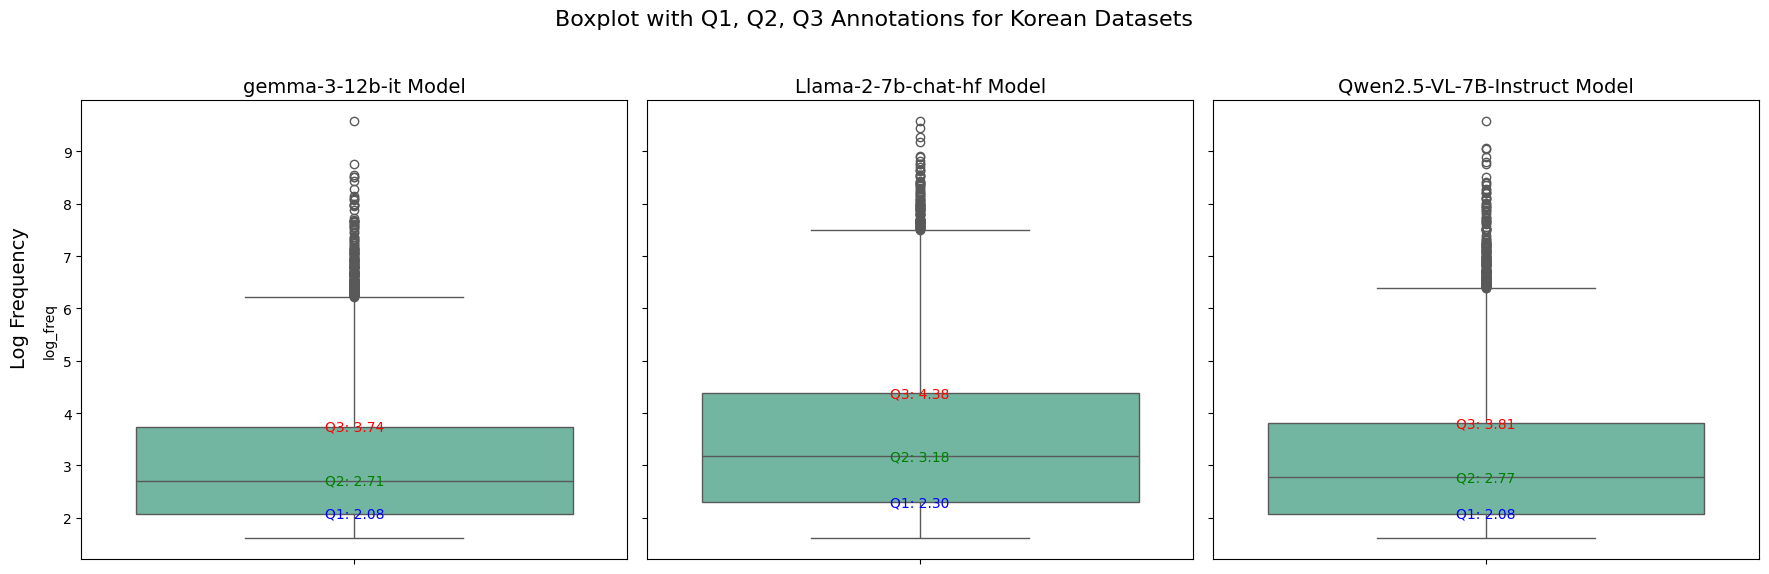

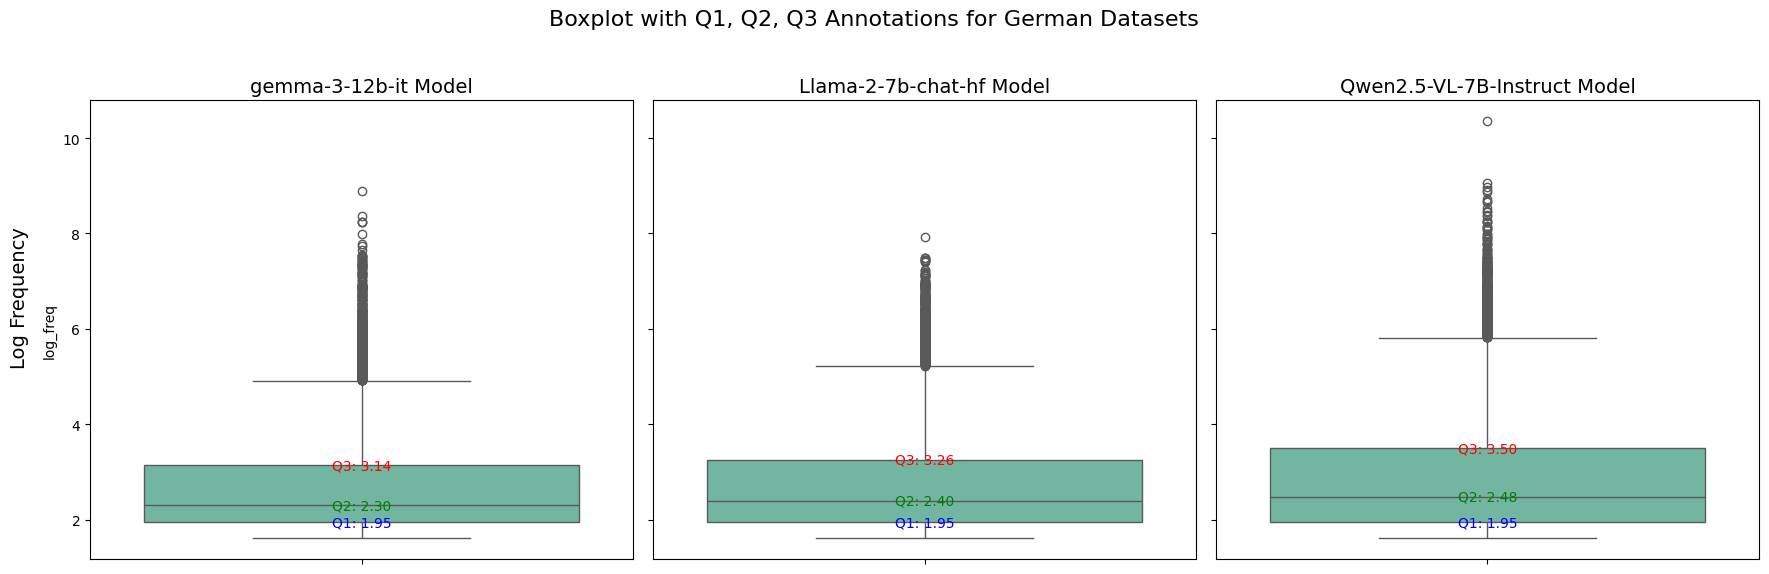

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


for language in ['English', 'Korean', 'German']:
    # List of dataset paths
    # dataset_paths = [
    #     f"/home/hyujang/multilingual-inner-lexicon/data/r1_dataset_Babel-9B-Chat_{language}-wiki-2token.csv",
    #     f"/home/hyujang/multilingual-inner-lexicon/data/r1_dataset_gemma-3-12b-it_{language}-wiki-2token.csv",
    #     f"/home/hyujang/multilingual-inner-lexicon/data/r1_dataset_Llama-2-7b-chat-hf_{language}-wiki-2token.csv"
    # ]

    dataset_paths = [
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Babel-9B-Chat_{language}-wiki-2.csv",
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_gemma-3-12b-it_{language}-wiki-2.csv",
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Llama-2-7b-chat-hf_{language}-wiki-2.csv",
        # f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Qwen2.5-VL-7B-Instruct_{language}-wiki-2.csv",
    ]


    # Create a figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Iterate through each dataset and corresponding subplot
    for i, (path, ax) in enumerate(zip(dataset_paths, axes)):
        # Load the dataset
        df = pd.read_csv(path)
        df = df[df['label'] == 'realword']  # Filter for real words

        # Apply logarithmic transformation to the 'freq' column
        df['log_freq'] = df['freq'].apply(lambda x: np.log1p(x))  # log(1 + x) to handle 0 values

        # Create a boxplot
        sns.boxplot(data=df, y='log_freq', palette='Set2', ax=ax)

        # Calculate Q1, Q2 (median), and Q3
        q1 = df['log_freq'].quantile(0.25)
        q2 = df['log_freq'].median()
        q3 = df['log_freq'].quantile(0.75)

        # Annotate the boxplot with Q1, Q2, and Q3
        ax.text(0, q1, f"Q1: {q1:.2f}", ha='center', va='center', fontsize=10, color='blue')
        ax.text(0, q2, f"Q2: {q2:.2f}", ha='center', va='center', fontsize=10, color='green')
        ax.text(0, q3, f"Q3: {q3:.2f}", ha='center', va='center', fontsize=10, color='red')

        # Add title for each subplot
        ax.set_title(f"{path.split('/')[-1].split('_')[2]} Model", fontsize=14)

    # Add a shared y-axis label
    fig.text(0.02, 0.5, 'Log Frequency', va='center', rotation='vertical', fontsize=14)

    # Add a main title
    fig.suptitle(f'Boxplot with Q1, Q2, Q3 Annotations for {language} Datasets', fontsize=16)

    # Adjust layout
    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])

    plt.show()

## Check dataset distribution - frequency & token_length 

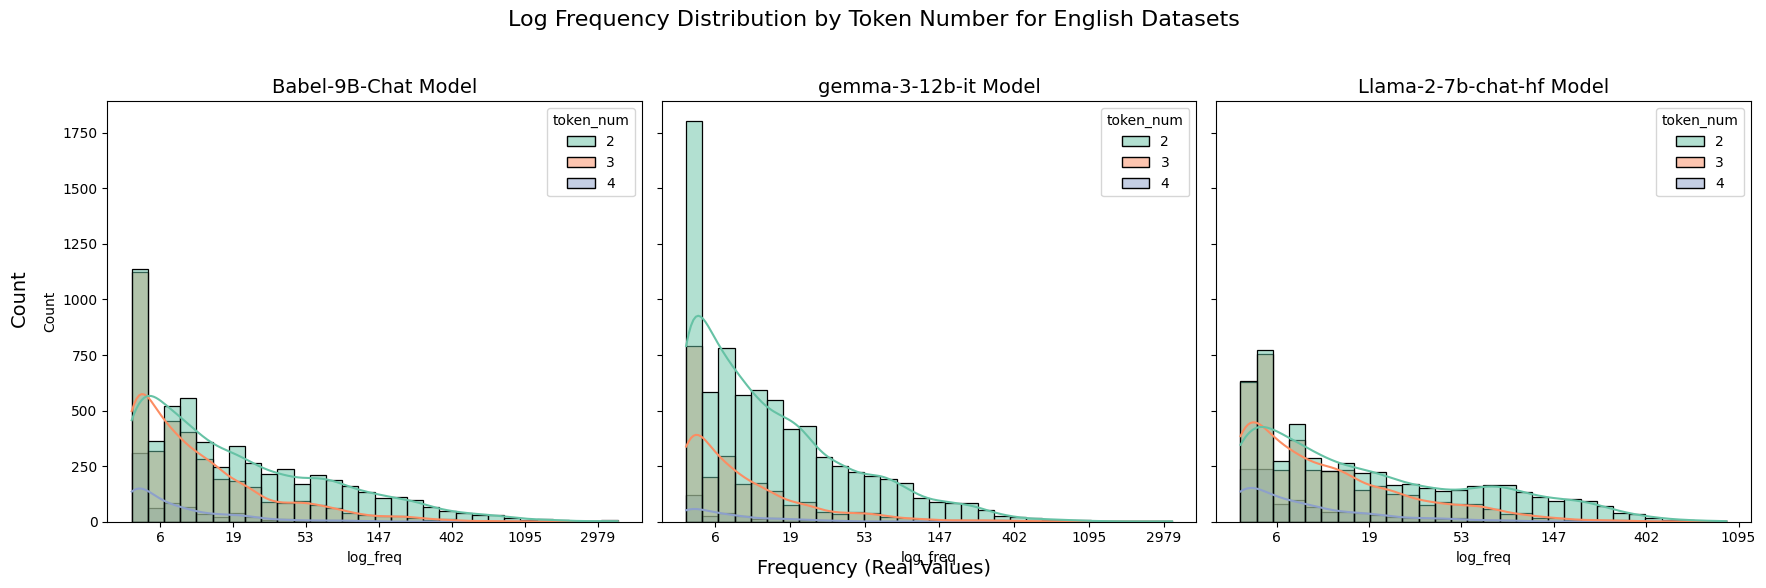

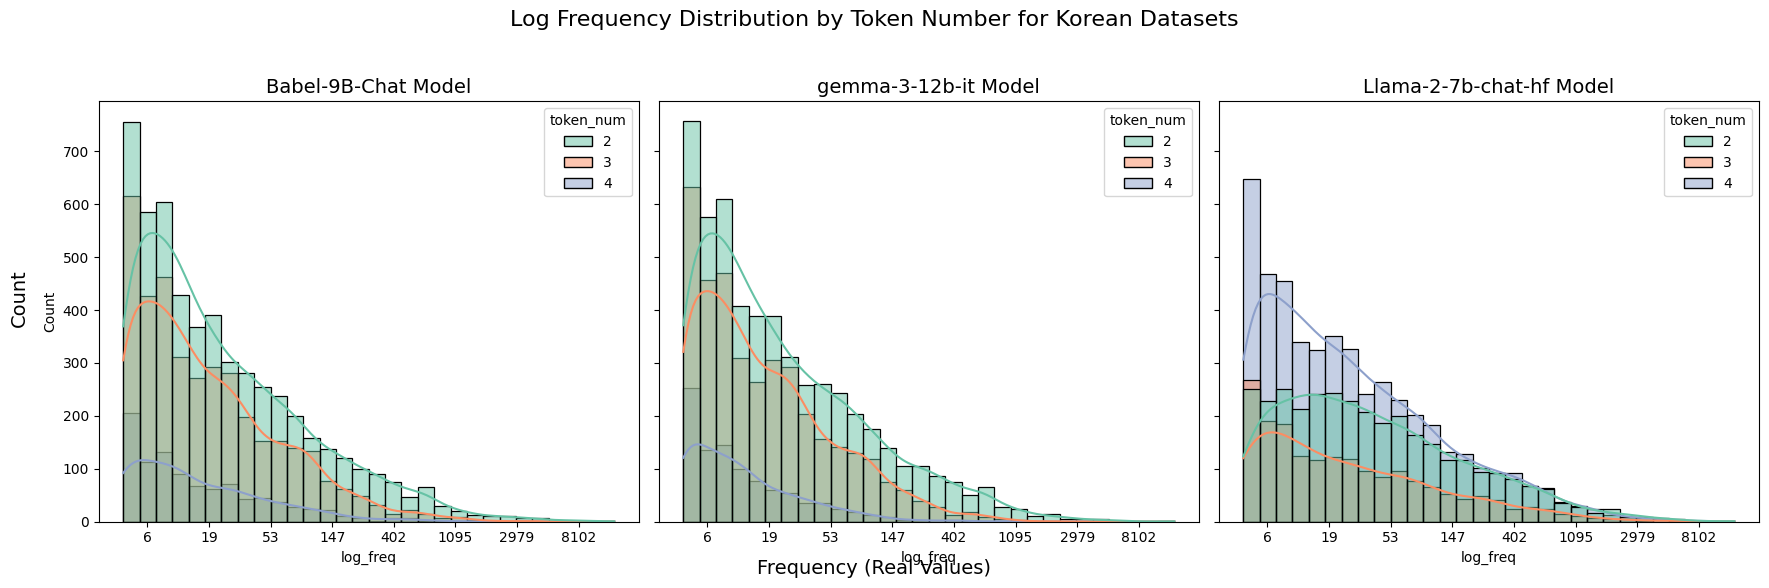

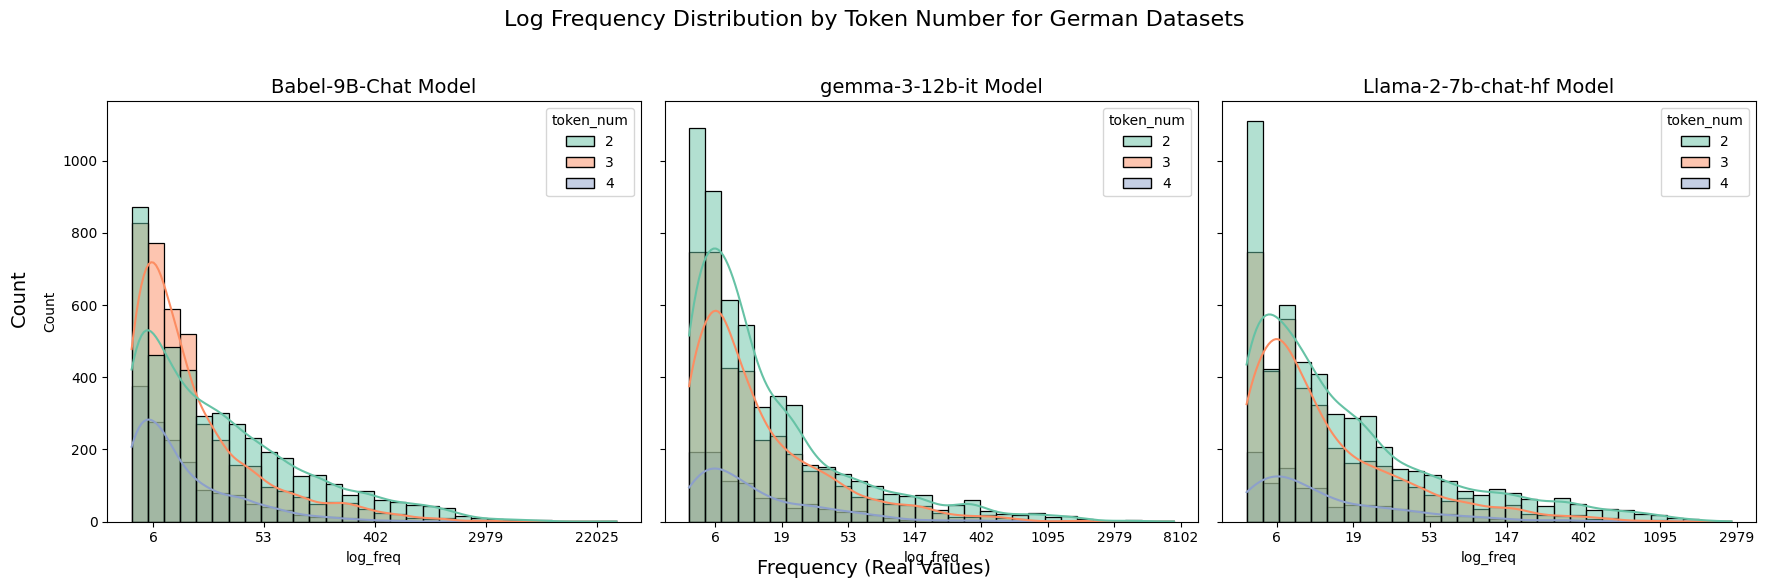

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

for language in ['English', 'Korean', 'German']:
    # List of dataset paths
    dataset_paths = [
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Babel-9B-Chat_{language}-wiki-2.csv",
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_gemma-3-12b-it_{language}-wiki-2.csv",
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Llama-2-7b-chat-hf_{language}-wiki-2.csv",
        # f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Qwen2.5-VL-7B-Instruct_{language}-wiki-2.csv",
    ]

    # Create a figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Iterate through each dataset and corresponding subplot
    for i, (path, ax) in enumerate(zip(dataset_paths, axes)):
        # Load the dataset
        df = pd.read_csv(path)
        df = df[df['label'] == 'realword']  # Filter for real words

        # Filter for token_num values 2, 3, and 4
        filtered_df = df[df['token_num'].isin([2, 3, 4])]

        # Apply logarithmic transformation to the 'freq' column
        filtered_df['log_freq'] = filtered_df['freq'].apply(lambda x: np.log1p(x))  # log(1 + x) to handle 0 values

        # Create a histogram
        sns.histplot(data=filtered_df, x='log_freq', hue='token_num', bins=30, palette='Set2', ax=ax, kde=True)

        # Customize x-axis to show real frequency values
        log_ticks = ax.get_xticks()  # Get the current x-axis ticks (log scale)
        real_ticks = [int(np.expm1(tick)) for tick in log_ticks]  # Convert log scale back to real values
        ax.set_xticklabels(real_ticks)  # Set the x-axis labels to real values

        # Add title for each subplot
        ax.set_title(f"{path.split('/')[-1].split('_')[2]} Model", fontsize=14)

    # Add a shared y-axis label
    fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical', fontsize=14)

    # Add a shared x-axis label
    fig.text(0.5, 0.04, 'Frequency (Real Values)', ha='center', fontsize=14)

    # Add a main title
    fig.suptitle(f'Log Frequency Distribution by Token Number for {language} Datasets', fontsize=16)

    # Adjust layout
    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])

    plt.show()

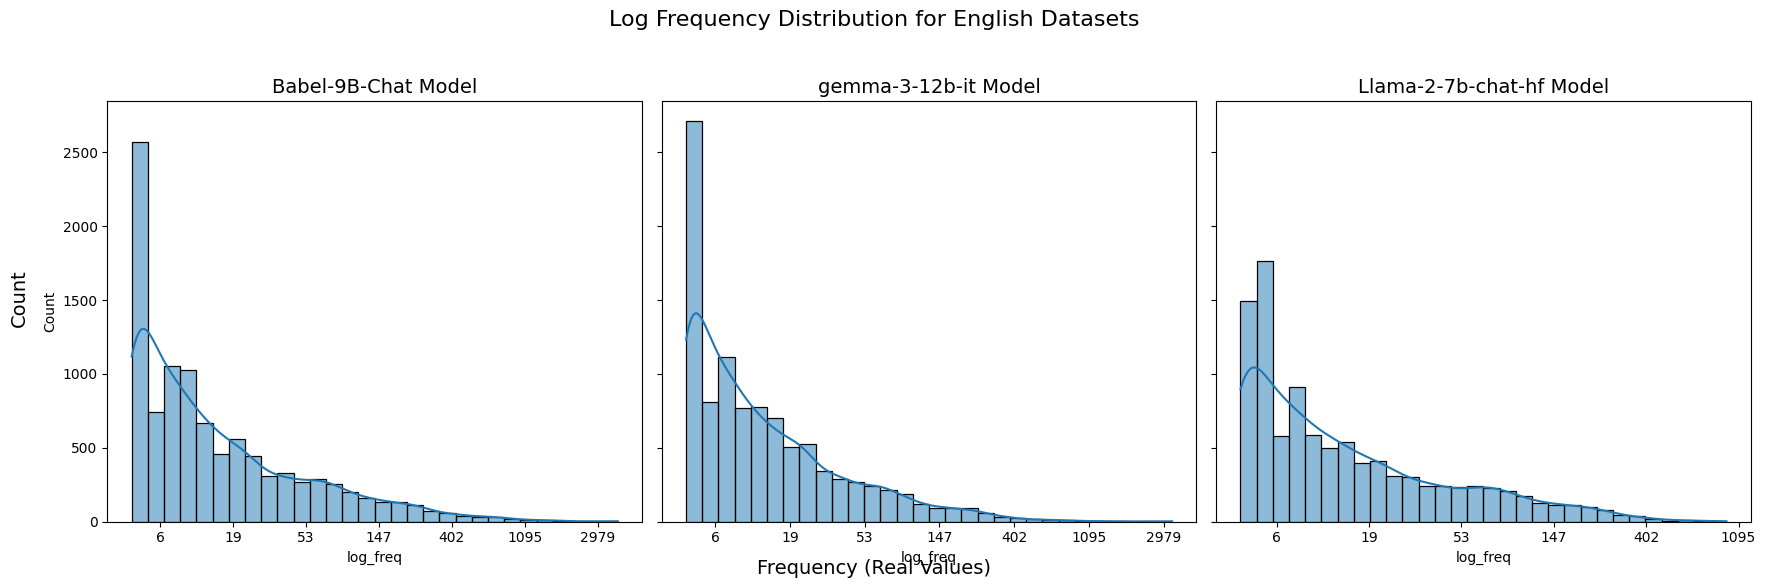

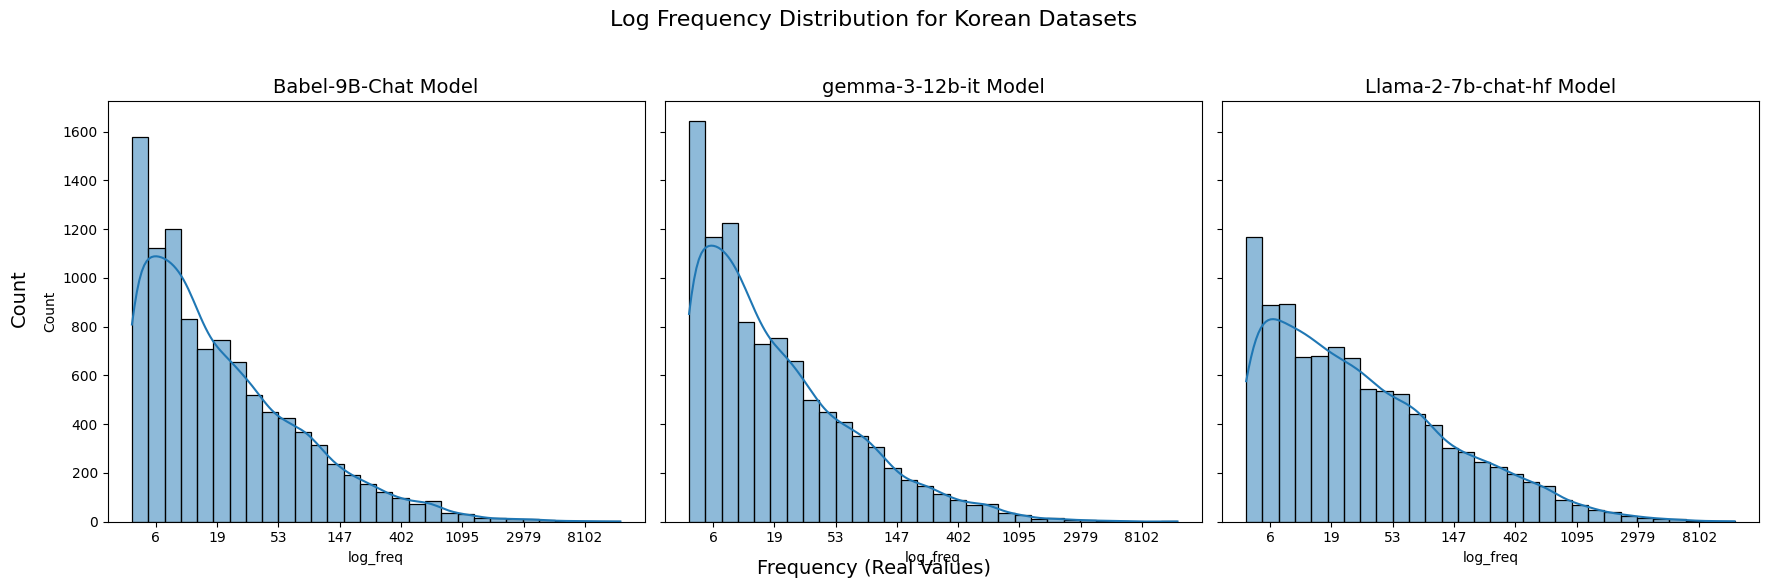

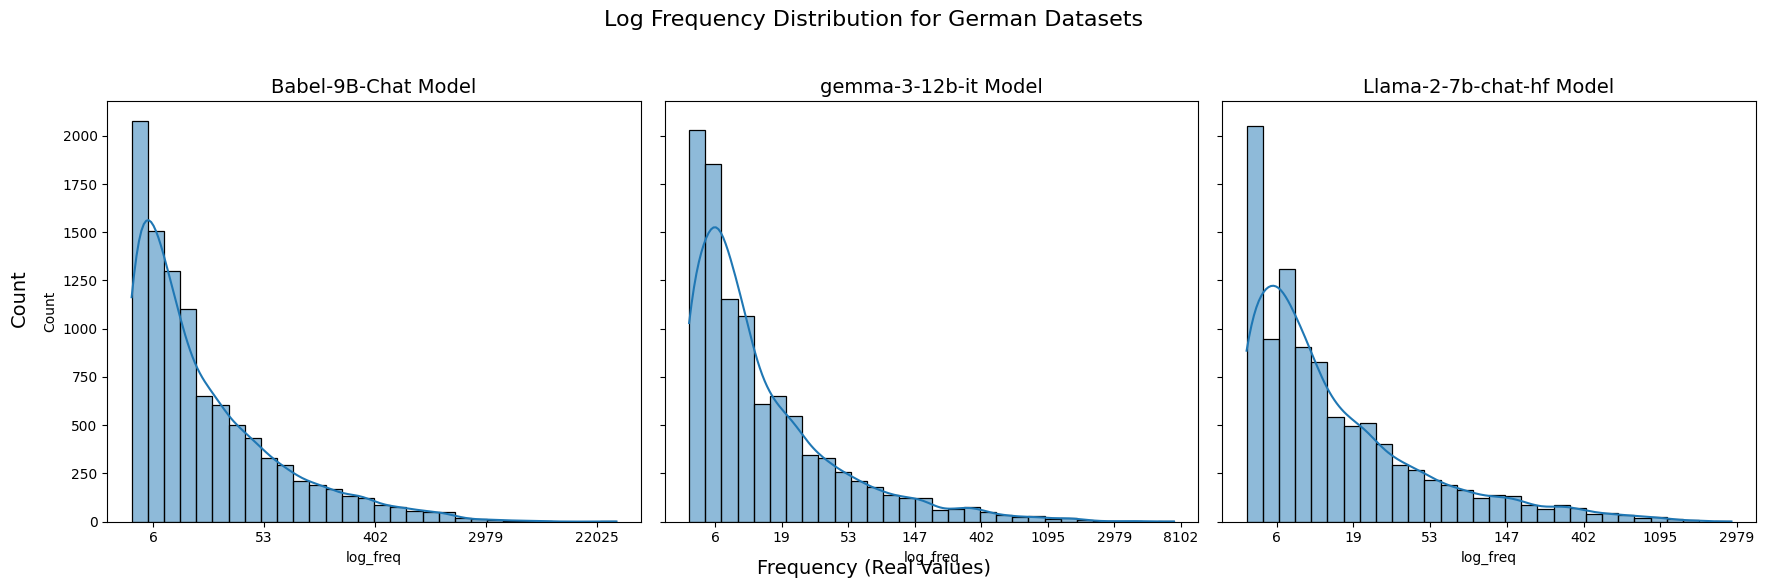

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

for language in ['English', 'Korean', 'German']:
    # List of dataset paths
    dataset_paths = [
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Babel-9B-Chat_{language}-wiki-2.csv",
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_gemma-3-12b-it_{language}-wiki-2.csv",
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Llama-2-7b-chat-hf_{language}-wiki-2.csv"
    ]

    # Create a figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Iterate through each dataset and corresponding subplot
    for i, (path, ax) in enumerate(zip(dataset_paths, axes)):
        # Load the dataset
        df = pd.read_csv(path)
        df = df[df['label'] == 'realword']  # Filter for real words

        # Apply logarithmic transformation to the 'freq' column
        df['log_freq'] = df['freq'].apply(lambda x: np.log1p(x))  # log(1 + x) to handle 0 values

        # Create a histogram
        sns.histplot(data=df, x='log_freq', bins=30, palette='Set2', ax=ax, kde=True)

        # Customize x-axis to show real frequency values
        log_ticks = ax.get_xticks()  # Get the current x-axis ticks (log scale)
        real_ticks = [int(np.expm1(tick)) for tick in log_ticks]  # Convert log scale back to real values
        ax.set_xticklabels(real_ticks)  # Set the x-axis labels to real values

        # Add title for each subplot
        ax.set_title(f"{path.split('/')[-1].split('_')[2]} Model", fontsize=14)

    # Add a shared y-axis label
    fig.text(0.02, 0.5, 'Count', va='center', rotation='vertical', fontsize=14)

    # Add a shared x-axis label
    fig.text(0.5, 0.04, 'Frequency (Real Values)', ha='center', fontsize=14)

    # Add a main title
    fig.suptitle(f'Log Frequency Distribution for {language} Datasets', fontsize=16)

    # Adjust layout
    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])

    plt.show()

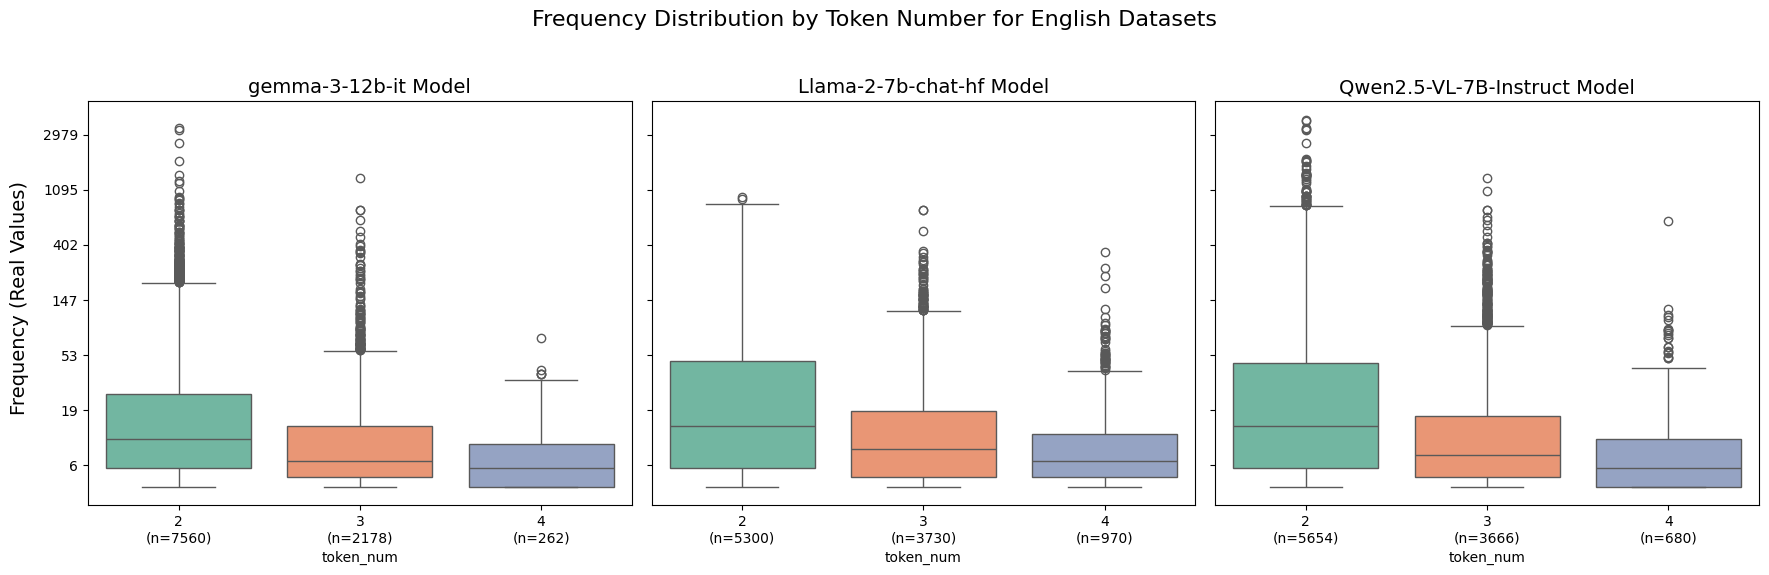

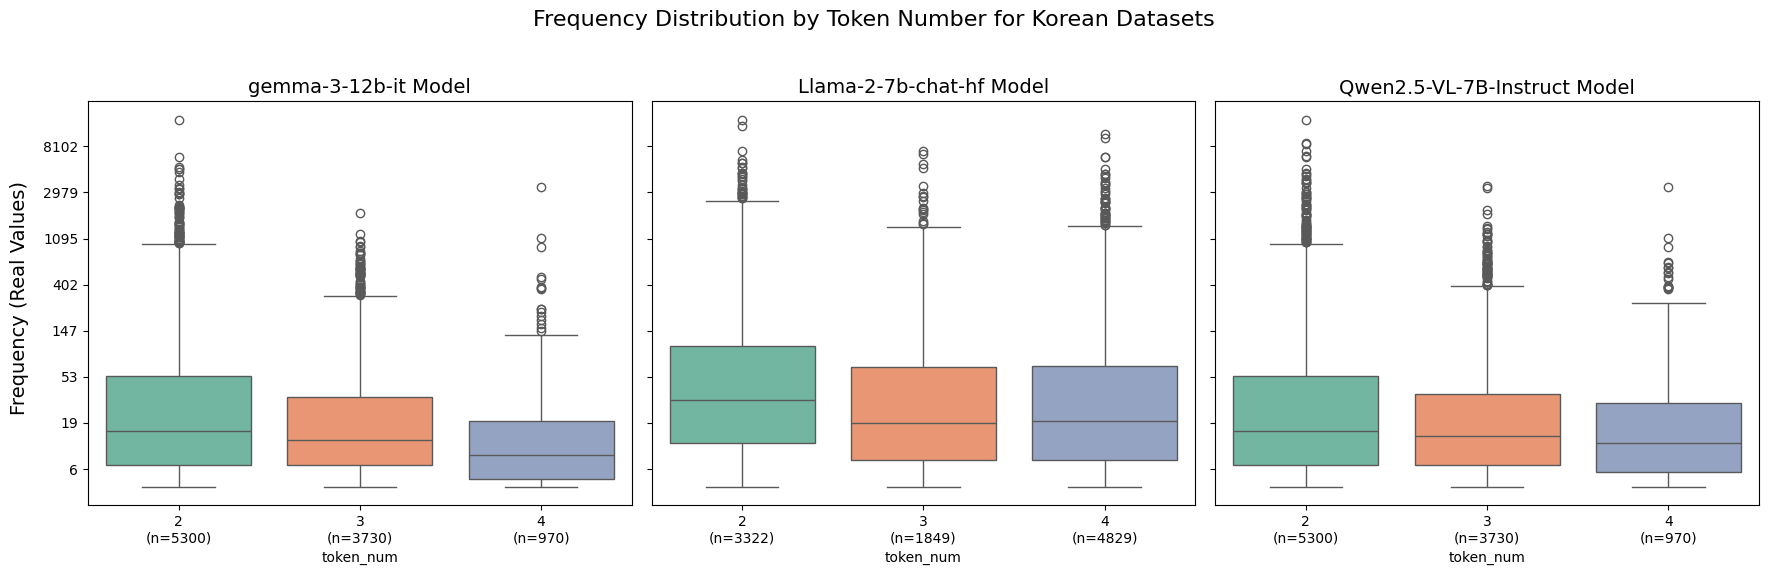

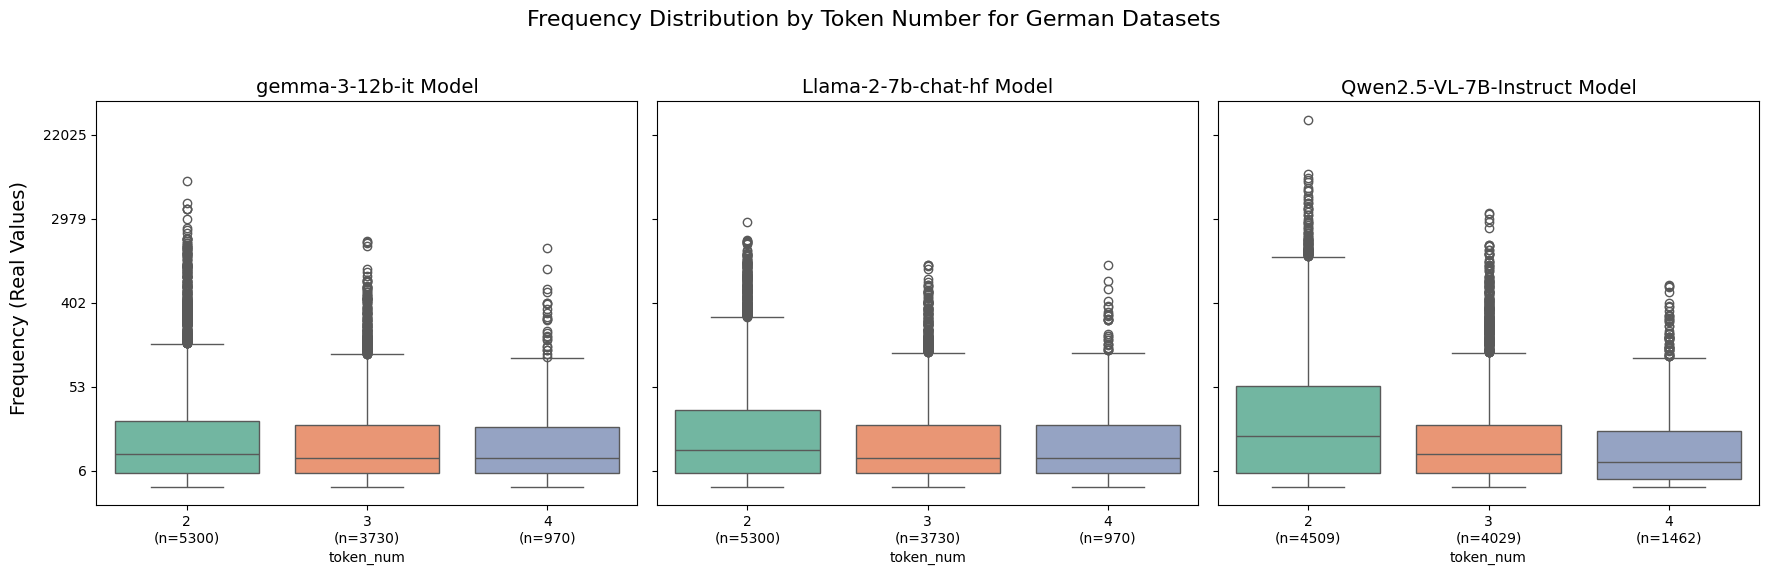

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


for language in ['English', 'Korean', 'German']:
    # List of dataset paths
    dataset_paths = [
        # f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Babel-9B-Chat_{language}-wiki-2.csv",
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_gemma-3-12b-it_{language}-wiki-2.csv",
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Llama-2-7b-chat-hf_{language}-wiki-2.csv",
        f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordNonword/r1_dataset_Qwen2.5-VL-7B-Instruct_{language}-wiki-2.csv",
    ]

    # Create a figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Iterate through each dataset and corresponding subplot
    for i, (path, ax) in enumerate(zip(dataset_paths, axes)):
        # Load the dataset
        df = pd.read_csv(path)
        df = df[df['label'] == 'realword']  # Filter for real words
        
        # Filter for token_num values 2, 3, and 4
        filtered_df = df[df['token_num'].isin([2, 3, 4])]
        
        # Apply logarithmic transformation to the 'freq' column
        filtered_df['log_freq'] = filtered_df['freq'].apply(lambda x: np.log1p(x))  # log(1 + x) to handle 0 values
        
        # Calculate value counts for token_num
        token_counts = filtered_df['token_num'].value_counts().sort_index()
        
        # Create a boxplot
        sns.boxplot(data=filtered_df, x='token_num', y='log_freq', palette='Set2', ax=ax)
        
        # Customize y-axis to show real frequency values
        log_ticks = ax.get_yticks()  # Get the current y-axis ticks (log scale)
        real_ticks = [int(np.expm1(tick)) for tick in log_ticks]  # Convert log scale back to real values
        ax.set_yticklabels(real_ticks)  # Set the y-axis labels to real values
        
        # Annotate x-axis with value_counts
        x_labels = [f"{int(token)}\n(n={count})" for token, count in zip(token_counts.index, token_counts.values)]
        ax.set_xticklabels(x_labels)
        
        ax.set_ylabel('')
        
        # Add title for each subplot
        ax.set_title(f"{path.split('/')[-1].split('_')[2]} Model", fontsize=14)

    # Add a shared y-axis label
    fig.text(0.02, 0.5, 'Frequency (Real Values)', va='center', rotation='vertical', fontsize=14)

    # Add a shared x-axis label
    # fig.text(0.5, 0.04, 'Token Number', ha='center', fontsize=14)

    # Add a main title
    fig.suptitle(f'Frequency Distribution by Token Number for {language} Datasets', fontsize=16)

    # Adjust layout
    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])

    plt.savefig(f'/home/hyujang/multilingual-inner-lexicon/data/RQ1/{language.lower()}_token_distribution.png', dpi=300)

    plt.show()

/tmp/ipykernel_272446/2292780815.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='token_num', y='log_freq', palette='Set2')
/tmp/ipykernel_272446/2292780815.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(real_ticks)  # Set the y-axis labels to real values
/tmp/ipykernel_272446/2292780815.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_labels)


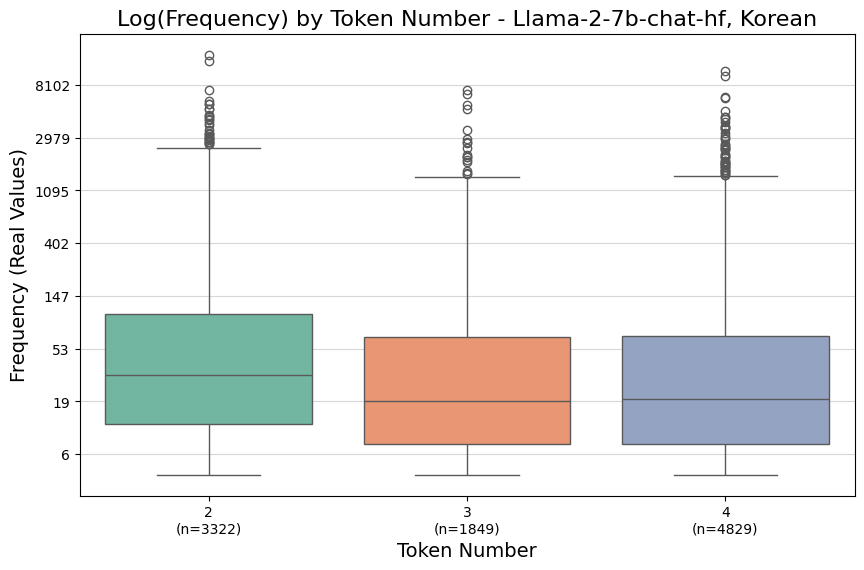

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = "/home/hyujang/multilingual-inner-lexicon/data/r1_dataset_Llama-2-7b-chat-hf_Korean-wiki-2.csv"
df = pd.read_csv(path)
df = df[df['label']=='realword']

filtered_df = df[df['token_num'].isin([2, 3, 4])]

# Apply logarithmic transformation to the 'freq' column
filtered_df['log_freq'] = filtered_df['freq'].apply(lambda x: np.log1p(x))  # log(1 + x) to handle 0 values

# Create a boxplot with log-transformed frequency
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='token_num', y='log_freq', palette='Set2')


log_ticks = plt.gca().get_yticks()  # Get the current y-axis ticks (log scale)
real_ticks = [int(np.expm1(tick)) for tick in log_ticks]  # Convert log scale back to real values
plt.gca().set_yticklabels(real_ticks)  # Set the y-axis labels to real values

token_counts = filtered_df['token_num'].value_counts().sort_index()
x_labels = [f"{int(token)}\n(n={count})" for token, count in zip(token_counts.index, token_counts.values)]
plt.gca().set_xticklabels(x_labels)

plt.title(f'Log(Frequency) by Token Number - {path.split("/")[-1].split("_")[2]}, {path.split("/")[-1].split("_")[3].split("-")[0]}', fontsize=16)
plt.xlabel('Token Number', fontsize=14)
plt.ylabel('Frequency (Real Values)', fontsize=14)
plt.grid(axis='y', alpha=0.5)
plt.show()

## Check babel korean encoding

In [6]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Tower-Babel/Babel-9B-Chat", use_fast=True)
a = tokenizer.tokenize("안녕하세요")
tokenizer.convert_tokens_to_ids(a)


[126246, 144370, 91145]

In [7]:
tokenizer.convert_ids_to_tokens([126246, 144370, 91145])

['ìķĪ', 'ëħķ', 'íķĺìĦ¸ìļĶ']

In [13]:
df = pd.read_csv("/home/hyujang/multilingual-inner-lexicon/data/r1_dataset_Babel-9B-Chat_Korean-wiki-2.csv")
df['tokens'][0]

"['ì²ĺ', 'ìłĪ']"

In [ ]:
df = pd.read_csv("../data/r1_dataset_Babel-9B-Chat_Korean-wiki.csv")
# df = pd.read_csv("../data/r1_dataset_Babel-9B-Chat_English-wiki.csv")
# df = pd.read_csv("../data/r1_dataset_Babel-9B-Chat_Korean-wiki(kiwi).csv")

df[df.duplicated('word')]
df['token_num'].value_counts().idxmax()

,word,tokens,token_num,freq,freq_quantile,label


## Check tokenizers comparison

In [ ]:
# Load all datasets
files = [
    "../data/de_wiki_noun_frequencies_lemmatized_1.csv",
    "../data/de_wiki_noun_frequencies_lemmatized_2-1.csv",
    "../data/de_wiki_noun_frequencies_lemmatized_2-2.csv",
    "../data/de_wiki_noun_frequencies_lemmatized_2-3.csv",
    "../data/de_wiki_noun_frequencies_lemmatized_3.csv"
]

# Read and concatenate all datasets
dfs = [pd.read_csv(file) for file in files]
combined_df = pd.concat(dfs, ignore_index=True)

# Group by 'word' and sum the 'freq' column
summed_df = combined_df.groupby('word', as_index=False)['freq'].sum()

# Sort by frequency in descending order (optional)
summed_df = summed_df.sort_values(by='freq', ascending=False).reset_index(drop=True)

# Save the result to a new CSV file (optional)
# summed_df.to_csv("../data/de_wiki_noun_frequencies_lemmatized.csv", index=False)

# Display the first few rows of the result
print(summed_df.head())

             word   freq
0            Jahr  31379
1        Weblinks  12234
2  Einzelnachweis  11512
3     Jahrhundert  10471
4           Stadt   8535


In [30]:
df_en = pd.read_csv("/home/hyujang/multilingual-inner-lexicon/data/English_tokenizers_comparison.csv")
print(df_en['same_token_num'].value_counts())
# df_en['same_token_num2'] = df_en['token_num_babel_9b'] == df_en['token_num_gemma_12b']
print(df_en['same_token_num2'].value_counts())
print(df_en['any_token_num_is_1'].value_counts())


same_token_num
False    26179
True     24716
Name: count, dtype: int64
same_token_num2
True     34631
False    16264
Name: count, dtype: int64
any_token_num_is_1
False    42371
True      8524
Name: count, dtype: int64


In [12]:
df_de = pd.read_csv("/home/hyujang/multilingual-inner-lexicon/data/German_tokenizers_comparison.csv")
print(df_de['same_token_num'].value_counts())
df_de['same_token_num2'] = df_de['token_num_babel_9b'] == df_de['token_num_gemma_12b']
print(df_de['same_token_num2'].value_counts())

same_token_num
False    124571
True      45503
Name: count, dtype: int64
same_token_num2
False    101141
True      68933
Name: count, dtype: int64


In [39]:
df_ko = pd.read_csv("/home/hyujang/multilingual-inner-lexicon/data/Korean_tokenizers_comparison.csv")
print(df_ko['same_token_num'].value_counts())
# df_ko['same_token_num2'] = df_ko['token_num_babel_9b'] == df_ko['token_num_gemma_12b']
# print(df_ko['same_token_num2'].value_counts())
df_ko.columns

same_token_num
False    60595
Name: count, dtype: int64


Index(['word', 'tokens_babel_9b', 'token_num_babel_9b', 'tokens_gemma_12b',
       'token_num_gemma_12b', 'tokens_llama_2_7b', 'token_num_llama_2_7b',
       'avg_token_num', 'same_token_num', 'avg_token_num_rounded',
       'avg_token_num2', 'same_token_num2', 'avg_token_num2_rounded',
       'any_token_num_is_1', 'freq'],
      dtype='object')

<Axes: >

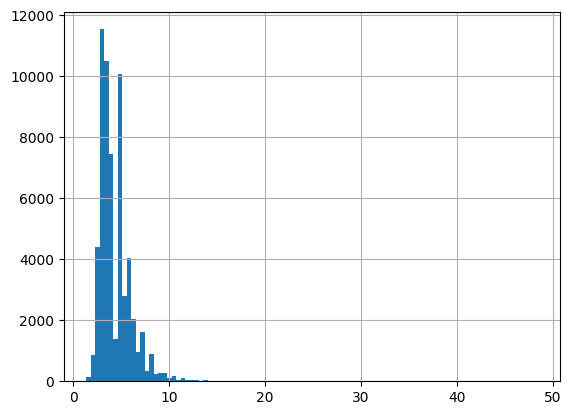

In [19]:
df_ko['avg_token_num'].hist(bins=100)

In [3]:
ko_dataset_paths = [
    "/home/hyujang/multilingual-inner-lexicon/data/r1_dataset_Babel-9B-Chat_Korean-wiki-2.csv",
    "/home/hyujang/multilingual-inner-lexicon/data/r1_dataset_gemma-3-12b-it_Korean-wiki-2.csv",
    "/home/hyujang/multilingual-inner-lexicon/data/r1_dataset_Llama-2-7b-chat-hf_Korean-wiki-2.csv"
]

pd.read_csv(ko_dataset_paths[0])

,word,tokens,token_num,freq,freq_quantile,label
0,처절,"['ì²ĺ', 'ìłĪ']",2,4.0,0.0,realword
1,라이타,"['ëĿ¼ìĿ´', 'íĥĢ']",2,5.0,0.0,realword
2,혼선,"['íĺ¼', 'ìĦł']",2,5.0,0.0,realword
3,파촉,"['íĮĮ', 'ì´ī']",2,6.0,0.0,realword
4,화환,"['íĻĶ', 'íĻĺ']",2,6.0,0.0,realword
...,...,...,...,...,...,...
19995,íģ¬íĥĪíķĺì§ģ,"('íģ¬', 'íĥĪ', 'íķĺ', 'ì§ģ')",4,NaN,NaN,nonword
19996,ëĶĶëĤĺëłĪìĿ´ëŁ¬,"('ëĶĶ', 'ëĤĺ', 'ëłĪìĿ´', 'ëŁ¬')",4,NaN,NaN,nonword
19997,ìķĦì¹´ìĨĲìłĦ,"('ìķĦ', 'ì¹´', 'ìĨĲ', 'ìłĦ')",4,NaN,NaN,nonword
19998,ìķĦëĤĺë¯¸ë§Ī,"('ìķĦ', 'ëĤĺ', 'ë¯¸', 'ë§Ī')",4,NaN,NaN,nonword
